# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

### Import libraries


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, load_digits
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report


%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (25.0, 10.0)
sns.set()

## Exercises

### Exercise 1

Classify the digit dataset with a decision tree such that your classifier is in overfit.

1. Show that actually the classifier overfits data.
2. Play with hyperparameters in order to improve the model performances on test set.
3. Apply ensemble methods (Random Forest or the explicit bagging classifier) to show how these reduce overfit and increase test accuracy.

__NOTE__: you should get a final accuracy above the $95\%$.

In [ ]:
digits = load_digits(as_frame=True)

X = digits.data 
y = digits.target 

In [ ]:
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

#### Data Overview
---

Il dataset è un famoso dataset contente immagini di cifre da 0 a 9. è un dataset pulito senza valori nulli con 1797 righe, 64 colonne ( le immagini infatti sono 8px * 8px).
Il Dataset non richiede attività di preprocessing, perché useremo un modello Decision Tree e tutte le features (colonne del Dataframe) sono entro gli stessi valori 0-255.
Non ha senso fare analisi della correlazione delle features con la variabile risposta giacché tutte le features sono importanti per la creazione dell'immagine.


<Figure size 2500x1000 with 0 Axes>

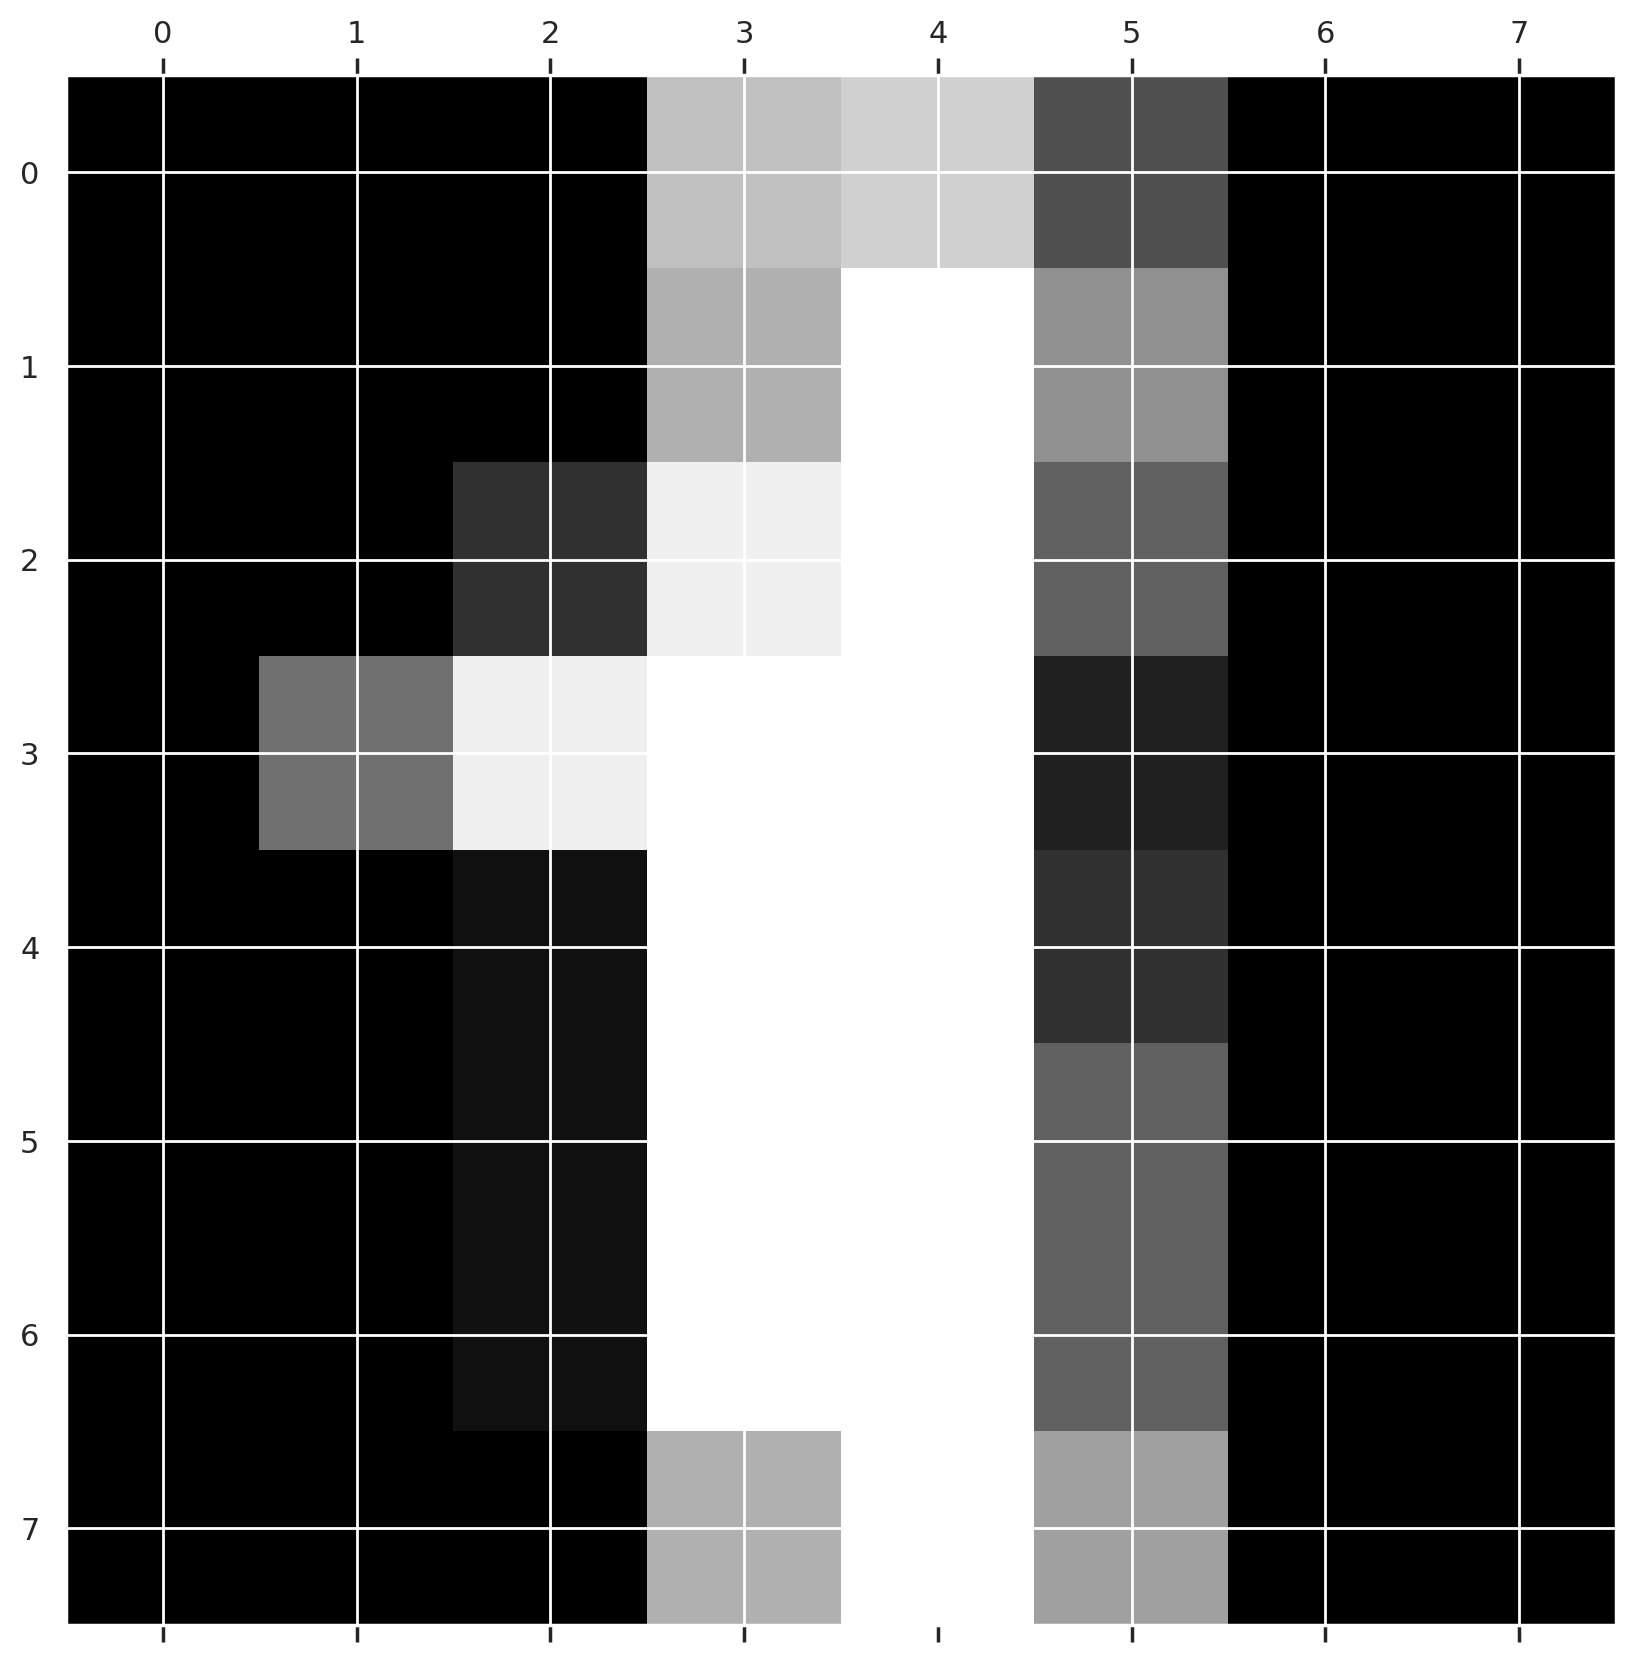

(1797, 64)


In [ ]:
plt.gray()

plt.matshow(digits.images[1])

plt.show()

print(X.shape)

#### Model Selection, Part 1
---

Partiamo con un modello base di tipo Decision Tree, come richiesto dall'esercizio

In [ ]:
#Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y,random_state=42)


#Scoring interessato: accuracy

scoring = "accuracy"

# KFold for Cross Validation

kf = KFold(n_splits = 10,shuffle=True,random_state=42) 

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))

accuracy = dt.score(X_test, y_test) 
print("Accuracy del modello sul test:", accuracy)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.74      0.69      0.71        36
           2       0.79      0.86      0.82        35
           3       0.78      0.84      0.81        37
           4       0.94      0.83      0.88        36
           5       0.79      0.92      0.85        37
           6       0.91      0.83      0.87        36
           7       0.81      0.83      0.82        36
           8       0.73      0.63      0.68        35
           9       0.77      0.75      0.76        36

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.81       360
weighted avg       0.82      0.82      0.82       360

Accuracy del modello sul test: 0.8166666666666667


In [ ]:
accuracy = dt.score(X_train, y_train) 
print("Accuracy del modello sul train per mostrare che il modello è in overfit:", accuracy)

Accuracy del modello sul train per mostrare che il modello è in overfit: 1.0


##### Procediamo con l'hyperparameter tuning

---

In [ ]:
# GridSerach CV
param_grid = {"max_depth": [5,8,20,50,100,200,300,400],
                "max_leaf_nodes": [50,100,200,300,400,500],
                "ccp_alpha" : [0,0.015,0.02]}



dt_cv = GridSearchCV(dt, param_grid, cv = kf, scoring = scoring) 
dt_cv.fit(X_train, y_train) 

print("Risultato di Cross validation:", dt_cv.best_params_)
print("Score del Cross Validation:", dt_cv.best_score_) 

y_pred = dt_cv.best_estimator_.predict(X_test)

accuracy = dt_cv.best_estimator_.score(X_test, y_test) 
print("Accuracy del modello sul test:", accuracy)


Risultato di Cross validation: {'ccp_alpha': 0, 'max_depth': 50, 'max_leaf_nodes': 500}
Score del Cross Validation: 0.8754127816627817
Accuracy del modello sul test: 0.8277777777777777


L'hyperparameter tuning non porta a risultati soddisfacienti. Supponiamo per via del parametro max_depth che di defalut è settato al massimo possibile e che influisce nel massimizzare il risultato sul test anche senza adeguamento dei parametri.

##### Ensamble methods
----
Passiamo all'utilizzo di metodi Ensamble

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=1000)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

accuracy = rf.score(X_test, y_test) 
print("Accuracy del modello sul test:", accuracy)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Accuracy del modello sul test: 0.9722222222222222


In [ ]:
# GridSerach CV
param_grid = {"n_estimators": [100,1000,1500], 
                "ccp_alpha" : [0,0.015,0.02]}

rf_cv = GridSearchCV(rf, param_grid, cv = kf, scoring = scoring) 
rf_cv.fit(X_train, y_train) 

print("Risultato di Cross validation:", rf_cv.best_params_)
print("Score del Cross Validation:", rf_cv.best_score_) 

y_pred = rf_cv.best_estimator_.predict(X_test)

accuracy = rf_cv.best_estimator_.score(X_test, y_test) 
print("Accuracy del modello sul test:", accuracy)

Risultato di Cross validation: {'ccp_alpha': 0, 'n_estimators': 100}
Score del Cross Validation: 0.9784090909090908
Accuracy del modello sul test: 0.9666666666666667


In [ ]:
#Bagging classifier
bg = BaggingClassifier(base_estimator=dt, n_estimators=1000, random_state=42)

bg.fit(X_train,y_train)
y_pred = bg.predict(X_test)
print(classification_report(y_test,y_pred))

accuracy = bg.score(X_test, y_test) 
print("Accuracy del modello sul test:", accuracy)


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.90      0.97      0.93        36
           2       1.00      0.91      0.96        35
           3       0.88      0.97      0.92        37
           4       0.92      0.94      0.93        36
           5       0.97      1.00      0.99        37
           6       1.00      0.94      0.97        36
           7       0.88      1.00      0.94        36
           8       0.86      0.71      0.78        35
           9       0.94      0.86      0.90        36

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360

Accuracy del modello sul test: 0.9277777777777778


In [ ]:
#BG con estimator estratto da Cv

bg_cv = BaggingClassifier(base_estimator=dt_cv.best_estimator_, n_estimators=1000, random_state=42)

bg_cv.fit(X_train,y_train)
y_pred = bg_cv.predict(X_test)
print(classification_report(y_test,y_pred))

accuracy = bg_cv.score(X_test, y_test) 
print("Accuracy del modello sul test:", accuracy)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.90      0.97      0.93        36
           2       1.00      0.91      0.96        35
           3       0.88      0.97      0.92        37
           4       0.92      0.94      0.93        36
           5       0.97      1.00      0.99        37
           6       1.00      0.94      0.97        36
           7       0.88      1.00      0.94        36
           8       0.86      0.71      0.78        35
           9       0.94      0.86      0.90        36

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360

Accuracy del modello sul test: 0.9277777777777778


### Risultato
----
Il migior modello è il Random Forest estratto dall'aggiustamento degli hyperparametri. Il Random Forest così estratto ha una accuratezza del 97.22 % sui dati di test

### Exercise 2

Predict the churn rate with the xgboost classifier.

Here, you will be working with churn data. This dataset contains imaginary data from a ride-sharing app with user behaviors over their first month of app usage in a set of imaginary cities as well as whether they used the service 5 months after sign-up.

Download the dataset [here](https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/churn_data.csv)

1. Write pipelines for preprocessing
2. Perform the right choices for hyperparameters.
3. Verify that your model does not overfits data. Measure the right metrics to justify your answers.

__NOTE__: you should get a final accuracy above the $75\%$.



1. data preprocessing: nan input, encoder, scaling...

undefined. definizione modello e tuning iperparametri

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/churn_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_dist                     50000 non-null  float64
 1   avg_rating_by_driver         49799 non-null  float64
 2   avg_rating_of_driver         41878 non-null  float64
 3   avg_inc_price                50000 non-null  float64
 4   inc_pct                      50000 non-null  float64
 5   weekday_pct                  50000 non-null  float64
 6   fancy_car_user               50000 non-null  bool   
 7   city_Carthag                 50000 non-null  int64  
 8   city_Harko                   50000 non-null  int64  
 9   phone_iPhone                 50000 non-null  int64  
 10  first_month_cat_more_1_trip  50000 non-null  int64  
 11  first_month_cat_no_trips     50000 non-null  int64  
 12  month_5_still_here           50000 non-null  int64  
dtypes: bool(1), floa

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_inc_price,inc_pct,weekday_pct,fancy_car_user,city_Carthag,city_Harko,phone_iPhone,first_month_cat_more_1_trip,first_month_cat_no_trips,month_5_still_here
0,3.67,5.0,4.7,1.10,15.4,46.2,True,0,1,1,1,0,1
1,8.26,5.0,5.0,1.00,0.0,50.0,False,1,0,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,100.0,False,1,0,1,1,0,0
3,2.36,4.9,4.6,1.14,20.0,80.0,True,0,1,1,1,0,1
4,3.13,4.9,4.4,1.19,11.8,82.4,False,0,0,0,1,0,0


In [ ]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_inc_price,inc_pct,weekday_pct,city_Carthag,city_Harko,phone_iPhone,first_month_cat_more_1_trip,first_month_cat_no_trips,month_5_still_here
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,60.926084,0.330680,0.202600,0.691640,0.410040,0.307800,0.449880
std,5.707357,0.446652,0.617338,0.222336,19.958811,37.081503,0.470463,0.401941,0.461821,0.491846,0.461588,0.497487
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,66.700000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df = df.astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_dist                     50000 non-null  float64
 1   avg_rating_by_driver         49799 non-null  float64
 2   avg_rating_of_driver         41878 non-null  float64
 3   avg_inc_price                50000 non-null  float64
 4   inc_pct                      50000 non-null  float64
 5   weekday_pct                  50000 non-null  float64
 6   fancy_car_user               50000 non-null  float64
 7   city_Carthag                 50000 non-null  float64
 8   city_Harko                   50000 non-null  float64
 9   phone_iPhone                 50000 non-null  float64
 10  first_month_cat_more_1_trip  50000 non-null  float64
 11  first_month_cat_no_trips     50000 non-null  float64
 12  month_5_still_here           50000 non-null  float64
dtypes: float64(13)
m

In [ ]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_dist                     50000 non-null  float64
 1   avg_rating_by_driver         50000 non-null  float64
 2   avg_rating_of_driver         50000 non-null  float64
 3   avg_inc_price                50000 non-null  float64
 4   inc_pct                      50000 non-null  float64
 5   weekday_pct                  50000 non-null  float64
 6   fancy_car_user               50000 non-null  float64
 7   city_Carthag                 50000 non-null  float64
 8   city_Harko                   50000 non-null  float64
 9   phone_iPhone                 50000 non-null  float64
 10  first_month_cat_more_1_trip  50000 non-null  float64
 11  first_month_cat_no_trips     50000 non-null  float64
 12  month_5_still_here           50000 non-null  float64
dtypes: float64(13)
m

In [ ]:
#Splitting
X = df.drop("month_5_still_here",axis=1)
y = df['month_5_still_here']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y,random_state=42)

#Scoring interessato: accuracy

scoring = "accuracy"

# KFold for Cross Validation

kf = KFold(n_splits = 10,shuffle=True,random_state=42) 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
import xgboost as xgb

steps = [("standard_scaler", StandardScaler()),
        ("model", xgb.XGBClassifier())] 

pipeline = Pipeline(steps) 

pipeline.fit(X_train, y_train) 

y_pred = pipeline.predict(X_test)

accuracy = pipeline.score(X_test, y_test) 
print("Accuracy del modello sul test:", accuracy)

Accuracy del modello sul test: 0.7644


In [ ]:
xgb_pipeline = Pipeline(steps) 

param_grid = {"model__max_depth": [2,6,20],
                "model__gamma": [0,0.005,0.02],
                "model__reg_alpha": [0,0.005,0.02]}

grid = GridSearchCV(xgb_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid.fit(X_train,y_train)
print(grid.best_score_)


0.76285


In [ ]:
accuracy = grid.best_estimator_.score(X_test, y_test) 
print("Accuracy del modello sul test:", accuracy)
print("I migliori parametri: ", grid.best_params_)

Accuracy del modello sul test: 0.7653
I migliori parametri:  {'model__gamma': 0, 'model__max_depth': 2, 'model__reg_alpha': 0}


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=53f133e4-d090-44f8-819a-f2d0921ffe98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>